In [1]:
# Algorithmic methods imports

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from PIL import Image
from google.colab.patches import cv2_imshow
from IPython.display import clear_output

## Full inference
Written by Jay Jaewon Yoo

In [2]:
# Change this to contain the images to infer
# Can be a list of numpy arrays that are not of equal shape
test_data = cv2.imread("cat.png", cv2.IMREAD_GRAYSCALE)
test_data = np.expand_dims(test_data, axis=0)

In [3]:
print(test_data.shape)

(1, 525, 700)


In [4]:
inference_shape = (256, 256)

In [5]:
print(test_data)

[[[208 208 208 ... 220 221 221]
  [209 209 208 ... 220 221 221]
  [210 208 207 ... 220 221 221]
  ...
  [ 93  93  92 ... 192 188 186]
  [ 92  92  92 ... 192 188 188]
  [ 90  90  92 ... 188 188 191]]]


In [6]:
# Create patched data
processed_data_to_infer = []

test_data_y = test_data.shape[1]
test_data_x = test_data.shape[2]

y_starts = []
x_starts = []

y_start = 0
while y_start + inference_shape[0] < test_data_y:
  y_starts.append(y_start)
  y_start += inference_shape[0]

if test_data_y % inference_shape[0] != 0:
  y_starts.append(test_data_y - inference_shape[0])

x_start = 0
while x_start + inference_shape[1] < test_data_x:
  x_starts.append(x_start)
  x_start += inference_shape[1]

if test_data_x % inference_shape[1] != 0:
  x_starts.append(test_data_x - inference_shape[1])

for data_idx in range(len(test_data)):
  for y_start in y_starts:
    for x_start in x_starts:
      patch = test_data[data_idx, y_start:y_start + inference_shape[0], x_start:x_start + inference_shape[1]]
      processed_data_to_infer.append((data_idx, y_start, x_start, patch))

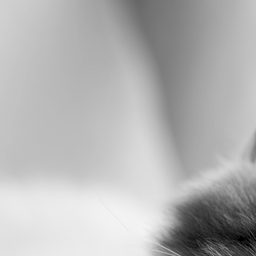

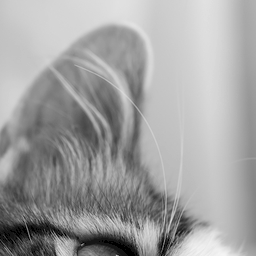

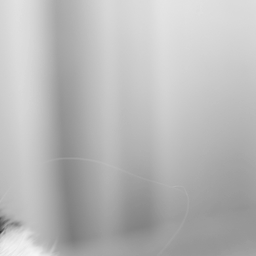

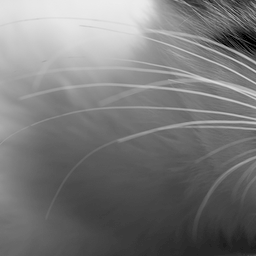

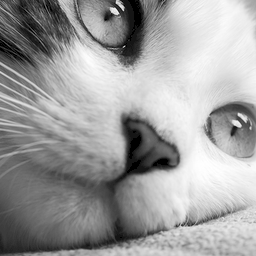

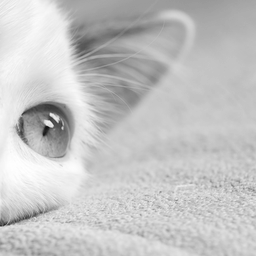

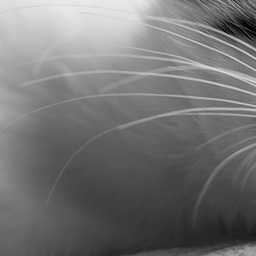

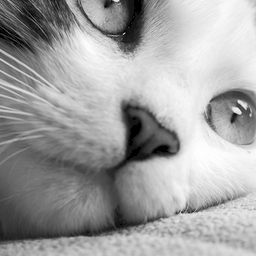

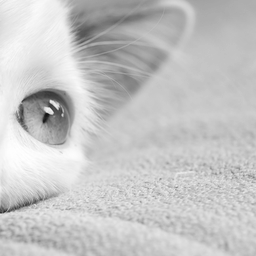

In [191]:
# Testing patching visually
for idx in range(len(processed_data_to_infer)):
  cv2_imshow(processed_data_to_infer[idx][3])

In [27]:
# For testing purposes
inferred_outputs = [processed_data[3] for processed_data in processed_data_to_infer]

In [43]:
inferred_data = np.zeros_like(test_data).astype(np.float64)

# Patching outputs back together
# inferred_outputs assumed to be in same order as processed_data_to_infer
divisor_array = np.zeros_like(inferred_data)
for idx in range(len(inferred_outputs)):
  image_idx, y_start, x_start = processed_data_to_infer[idx][:3]
  inferred_data[image_idx, y_start:y_start + inference_shape[0], x_start:x_start + inference_shape[1]] += inferred_outputs[idx]
  divisor_array[image_idx, y_start:y_start + inference_shape[0], x_start:x_start + inference_shape[1]] += 1

inferred_data = inferred_data / divisor_array

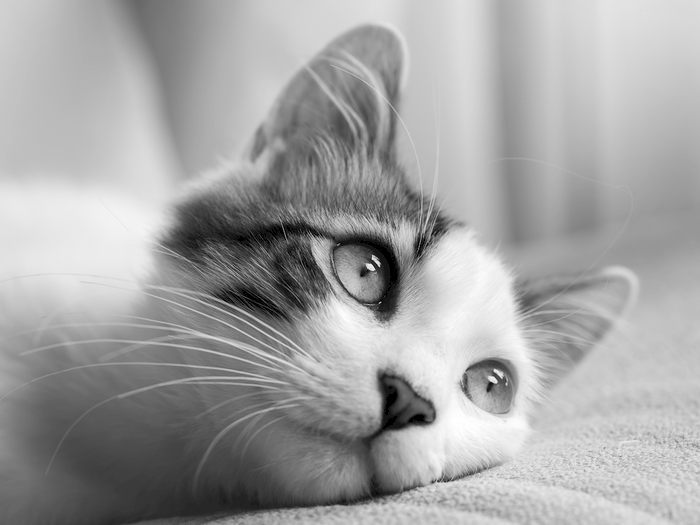

In [47]:
cv2_imshow(test_data[0])

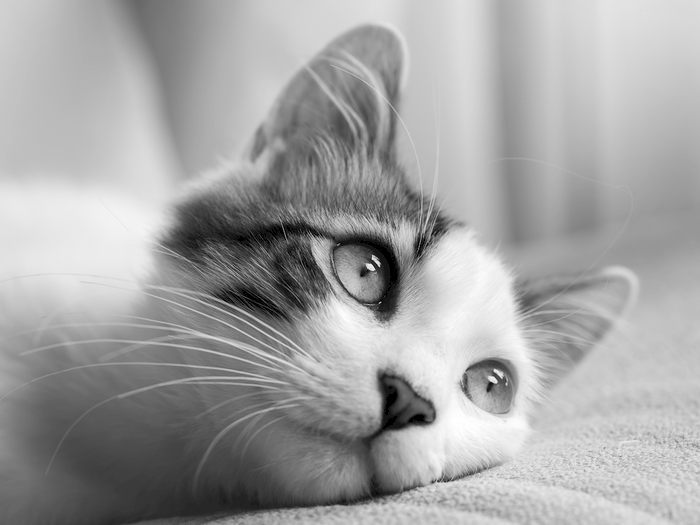

In [48]:
cv2_imshow(inferred_data[0])